In [2]:
L = [3, 1, 4, 1, 5, 9, 2, 6]
sorted(L)

[1, 1, 2, 3, 4, 5, 6, 9]

In [3]:
L.sort()
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [4]:
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

In [5]:
import numpy as np

In [6]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [7]:
x.sort()
print(x)

[1 2 3 4 5]


In [9]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [10]:
x[i]

array([1, 2, 3, 4, 5])

In [16]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [17]:
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [18]:
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [19]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([1, 2, 3, 4, 5, 6, 7])

In [20]:
np.partition(X, 2, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [21]:
X = rng.random([10, 2])

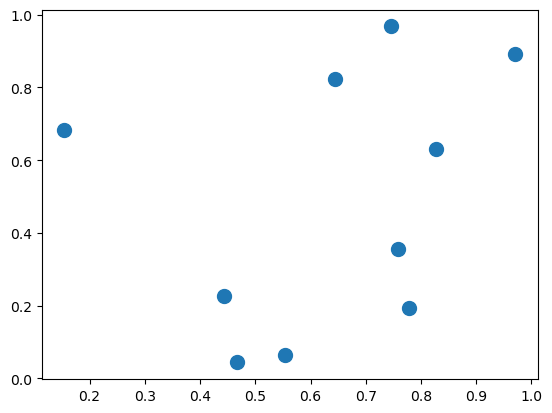

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s=100);

In [23]:
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)

In [24]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [26]:
sq_differences = differences ** 2
sq_differences

array([[[0.00000000e+00, 0.00000000e+00],
        [4.01805718e-02, 3.54647514e-01],
        [7.97097787e-03, 5.75996537e-01],
        [3.37699618e-02, 3.65181453e-02],
        [1.30468069e-02, 2.19244619e-01],
        [1.06819747e-01, 4.95046037e-03],
        [1.80951937e-02, 3.94538384e-01],
        [3.13800380e-02, 6.06775328e-01],
        [2.39684296e-01, 1.95196274e-02],
        [1.01802118e-02, 2.09520180e-02]],

       [[4.01805718e-02, 3.54647514e-01],
        [0.00000000e+00, 0.00000000e+00],
        [1.23588997e-02, 2.67065754e-02],
        [1.47622682e-01, 1.63560128e-01],
        [9.90194376e-02, 1.62020431e-02],
        [2.78028233e-01, 4.43399370e-01],
        [1.12204431e-01, 1.06276091e-03],
        [5.43207155e-04, 3.36483831e-02],
        [8.35930961e-02, 2.07762967e-01],
        [9.08105912e-02, 5.48001169e-01]],

       [[7.97097787e-03, 5.75996537e-01],
        [1.23588997e-02, 2.67065754e-02],
        [0.00000000e+00, 0.00000000e+00],
        [7.45543283e-02, 3.224

In [27]:
dist_sq = sq_differences.sum(-1)

In [28]:
dist_sq.shape

(10, 10)

In [29]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [30]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

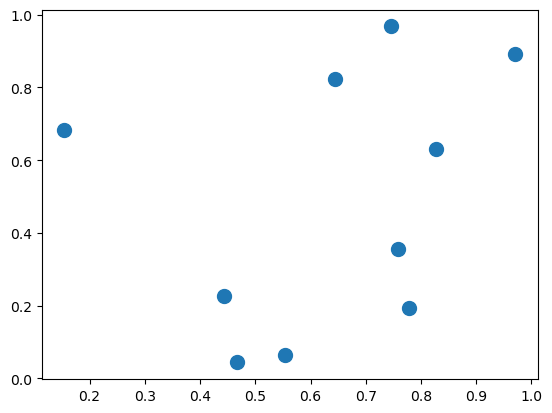

In [31]:
plt.scatter(X[:, 0], X[:, 1], s=100)

In [32]:
K = 2

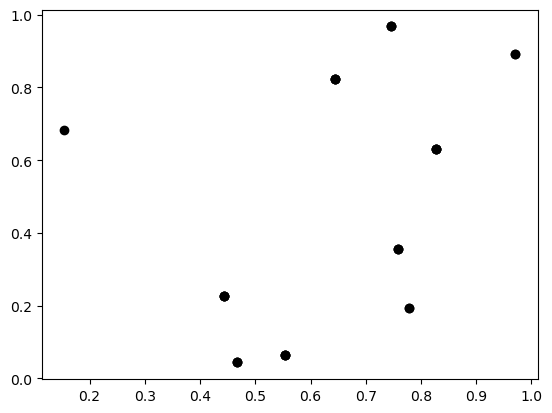

In [34]:
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(X[j][0], X[j][1], color='black', marker='o')
